## Loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import helper
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns



current_path = os.getcwd()

In [3]:
TECH_GIANTS = ["TSLA", "AAPL", 'QQQ', "SPY", "MSFT", "AMZN", "GOOG"]
start_date = "2010-01-01"
end_date = "2023-01-01"
stock_data = {}

for stock in TECH_GIANTS: 
    try:
        data_path = current_path + "\data" f"\{stock}_{start_date}_{end_date}.csv"
        data = pd.read_csv(data_path)
        data['Date'] = pd.to_datetime(data['Date'])
        data = helper.compute_rsi_class(data)  # Assuming you have this function in helper
        data = helper.compute_volume_class(data)  # Add volume analysis
        stock_data[stock] = data
        print(f"Data fetched for {stock}")
    except Exception as e:
        print(f"Error fetching data for {stock}: {str(e)}")

Data fetched for TSLA
Data fetched for AAPL
Data fetched for QQQ
Data fetched for SPY
Data fetched for MSFT
Data fetched for AMZN
Data fetched for GOOG


### Analysis

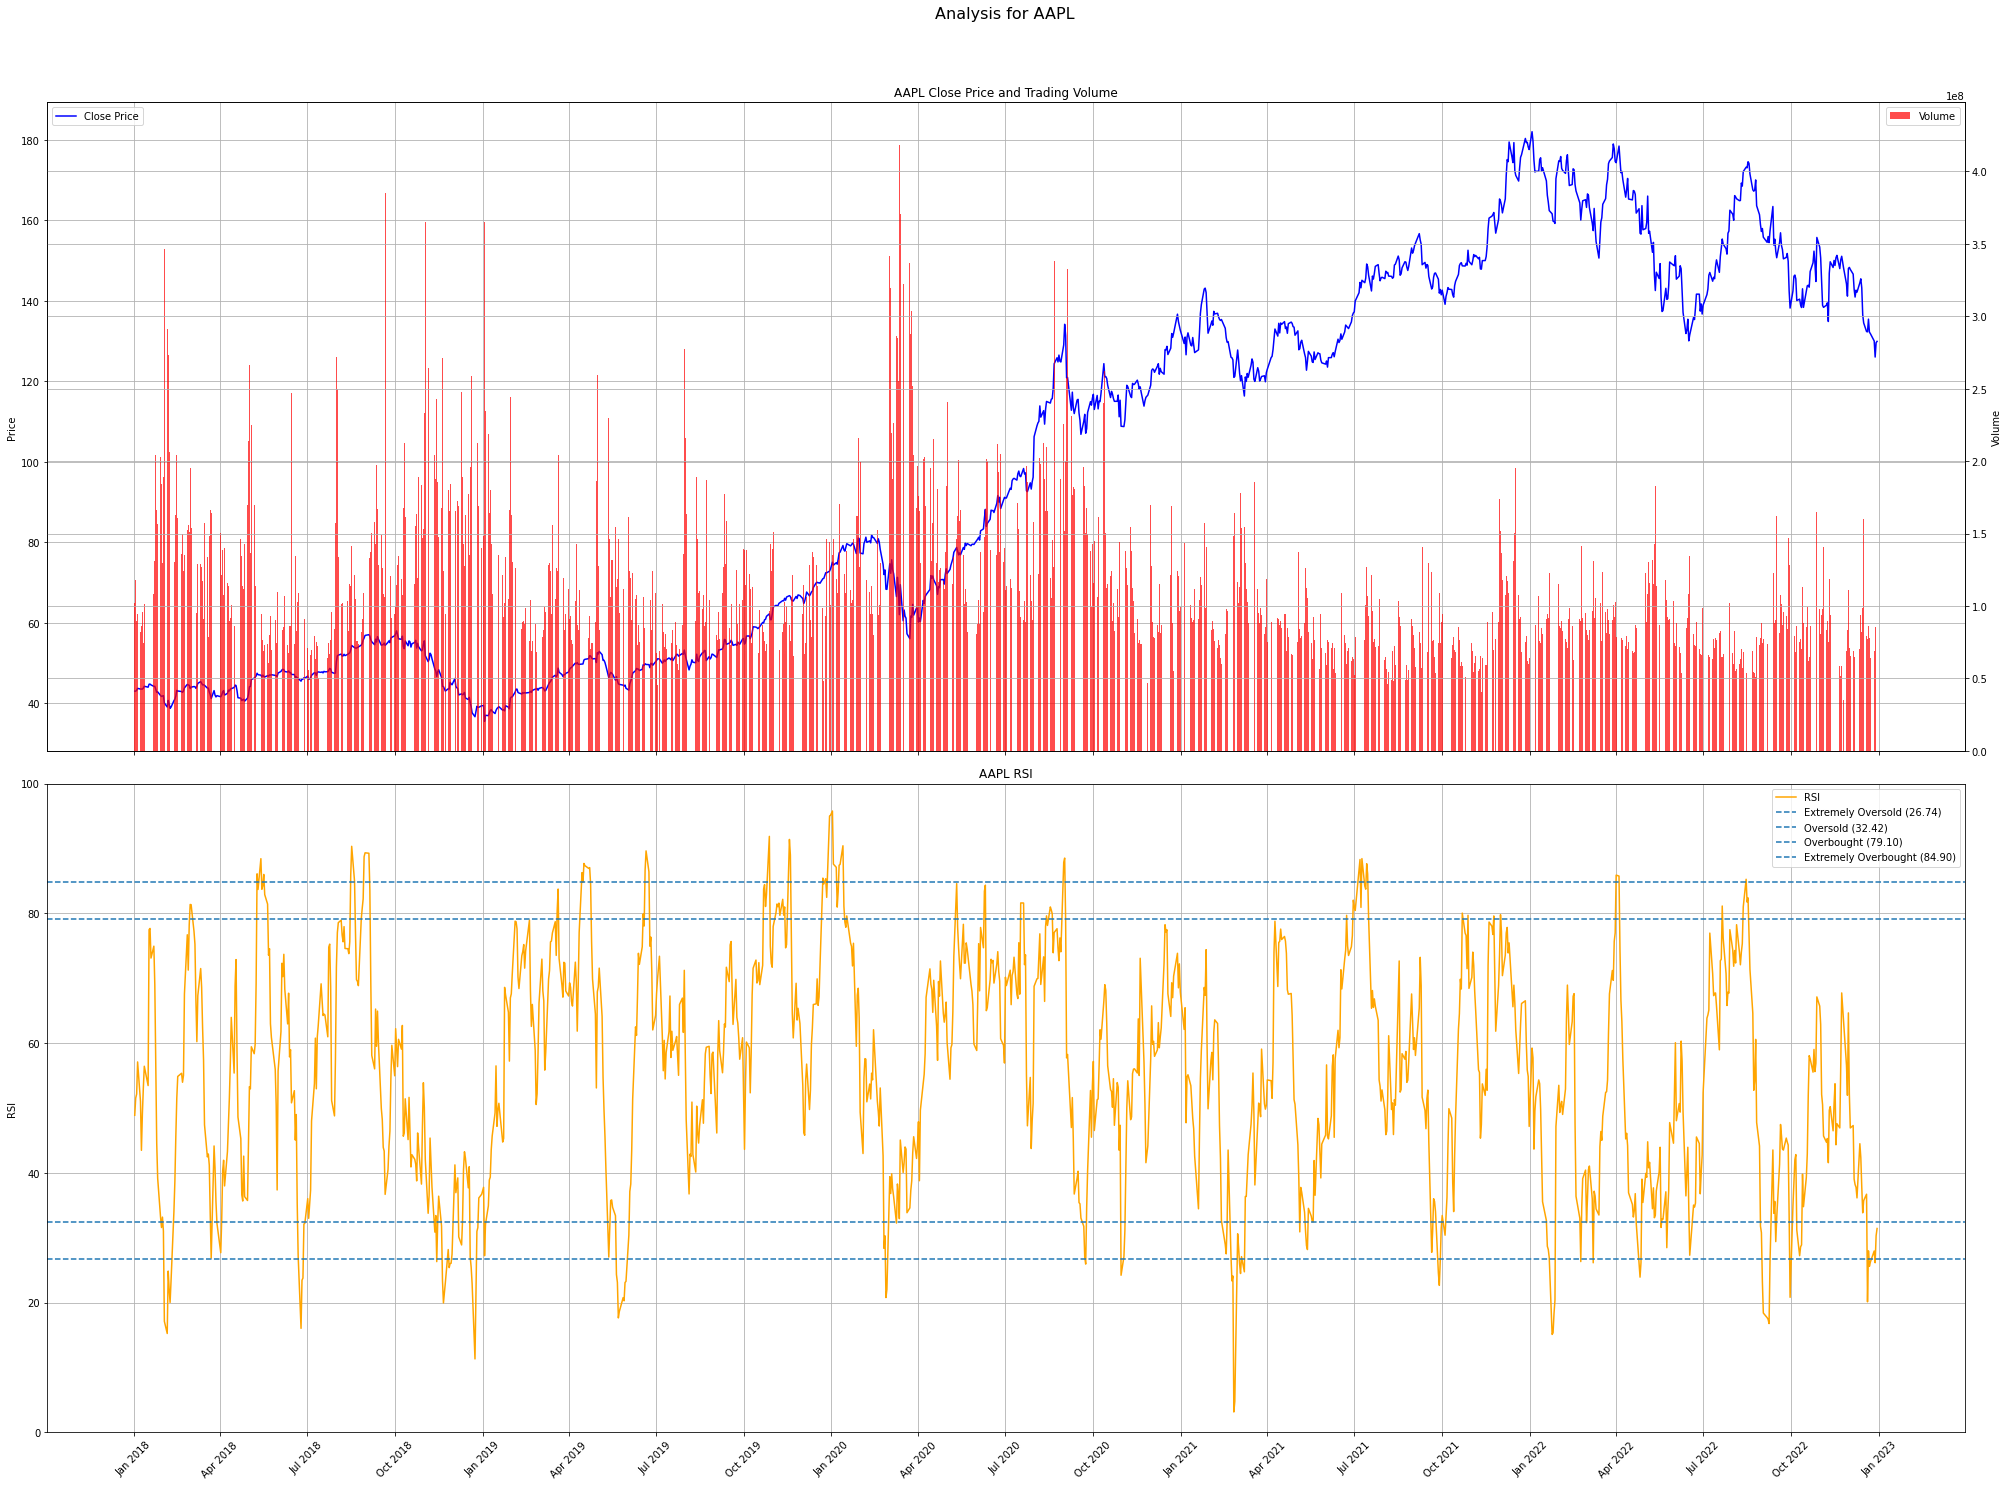

In [4]:
for stock, data in stock_data.items():
    if stock == "AAPL":
        data = data[data['Date'] >= "2018-01-01"]
        helper.plot_stock_data(stock, data)
        break

In [5]:
correlations = {}
price = 'Adj Close'
AAPL_close = stock_data["AAPL"][price]

for stock, data in stock_data.items():
    if stock != 'AAPL':  # We don't want to compare AAPL with itself
        other_close = data[price]
        
        combined_data = pd.concat([AAPL_close, other_close], axis=1, join='inner')
        combined_data.columns = ['AAPL', stock]
        
        combined_data.dropna(inplace=True)
        
        correlation = np.corrcoef(combined_data['AAPL'], combined_data[stock])[0, 1]
        correlations[stock] = correlation

print(correlations)


{'TSLA': 0.9328597386405821, 'QQQ': 0.9710468581604874, 'SPY': 0.9517774123087802, 'MSFT': 0.985362673912225, 'AMZN': 0.9204029863911463, 'GOOG': 0.9663440631640428}


### Volume

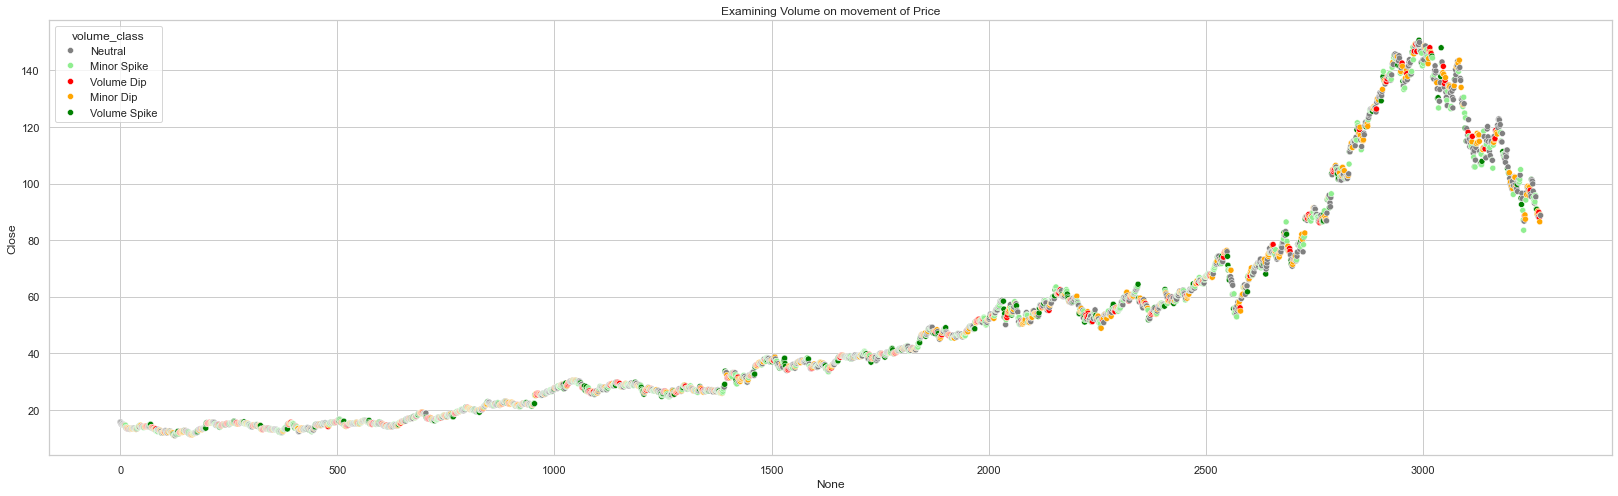

In [6]:
helper.plot_volume_category(data)

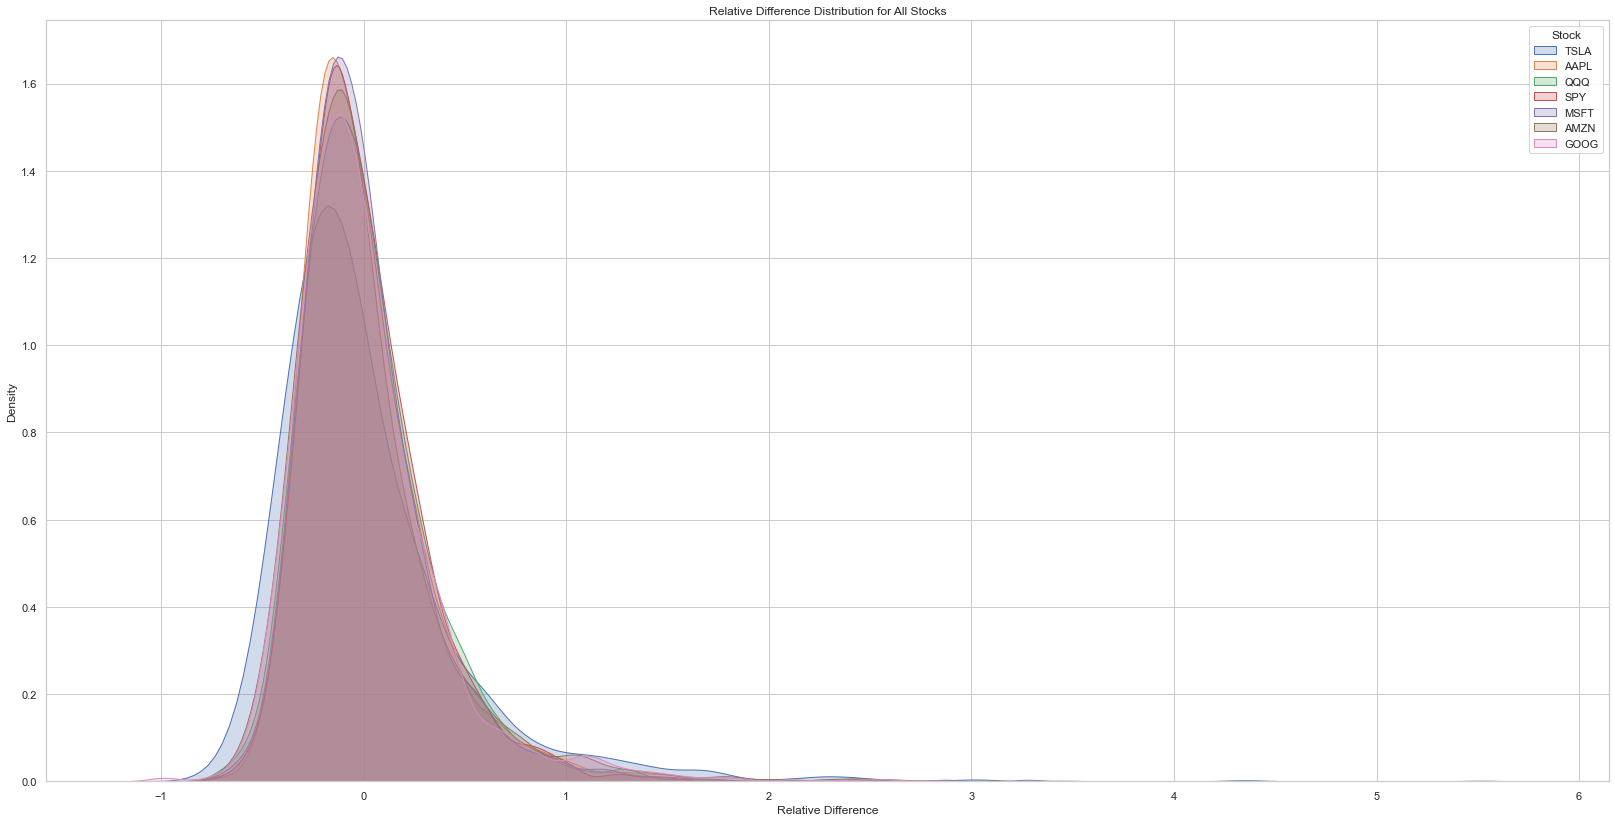

In [7]:
helper.plot_volume_distribution(stock_data)

### MA

### RSI

https://www.kaggle.com/code/riteshsinha/useful-features-in-predicting-stock-prices

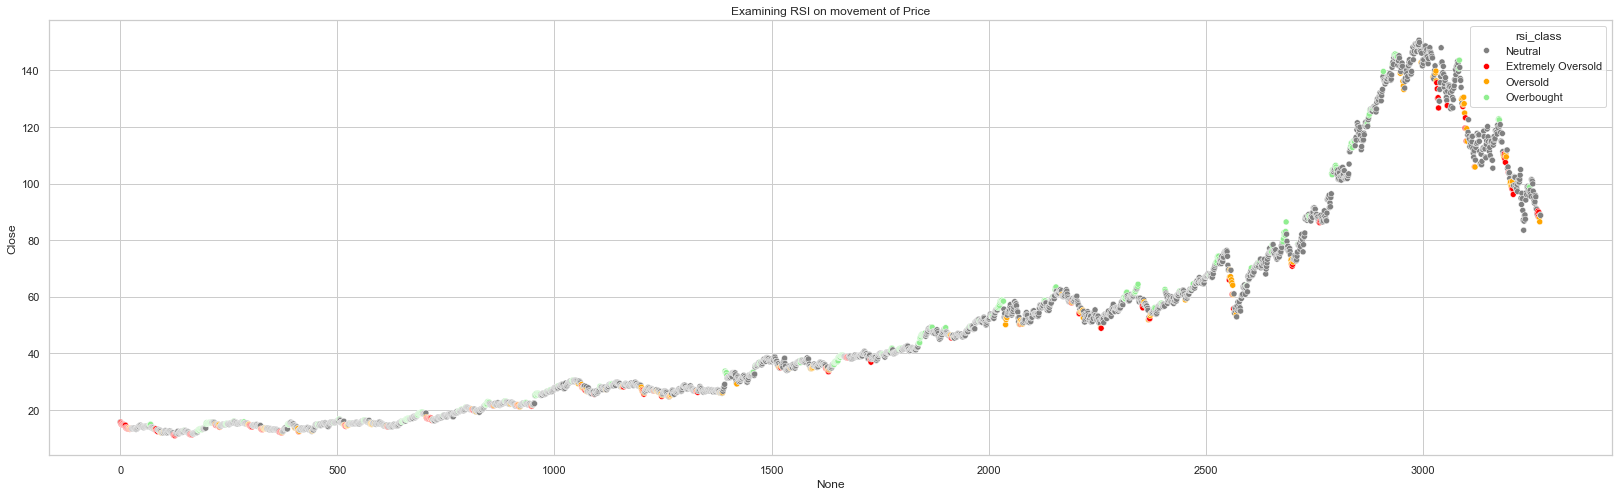

In [8]:
helper.plot_rsi_category(data)

In [9]:
y=data["Close"]

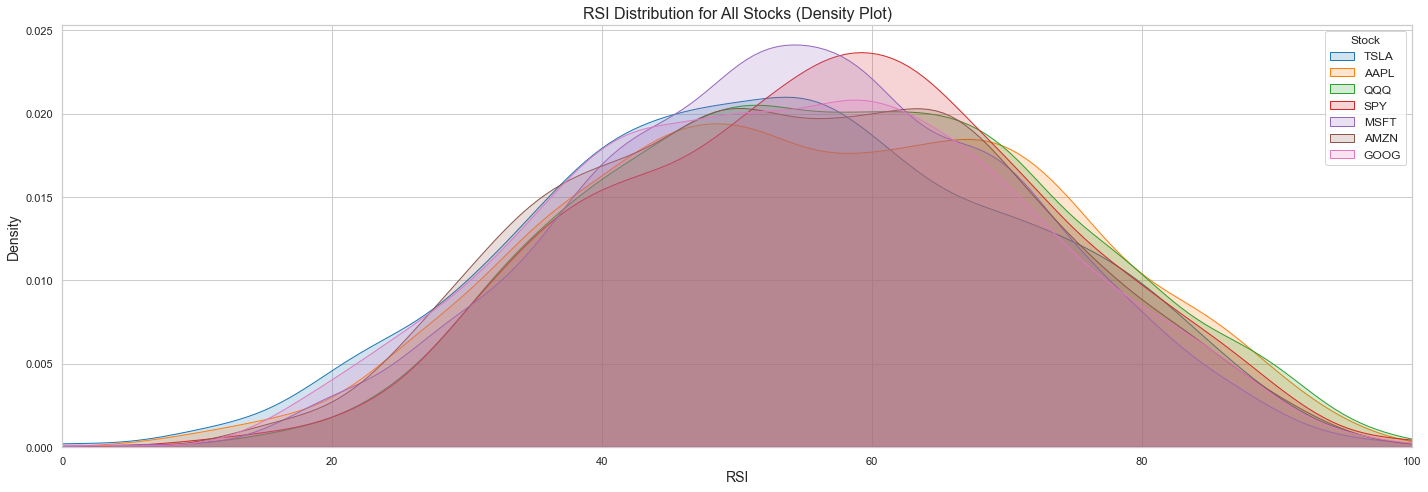

d:\OneDrive\Cornell\Fall 2023\Analyzing-the-Correlation-Between-Retail-Traders--Sentiments-and-Equity-Market-Movements\Data Extraction\Stock\helper.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Stock", y="RSI", data=rsi_data_long, palette="tab10", boxprops=dict(alpha=.7), width=0.6)


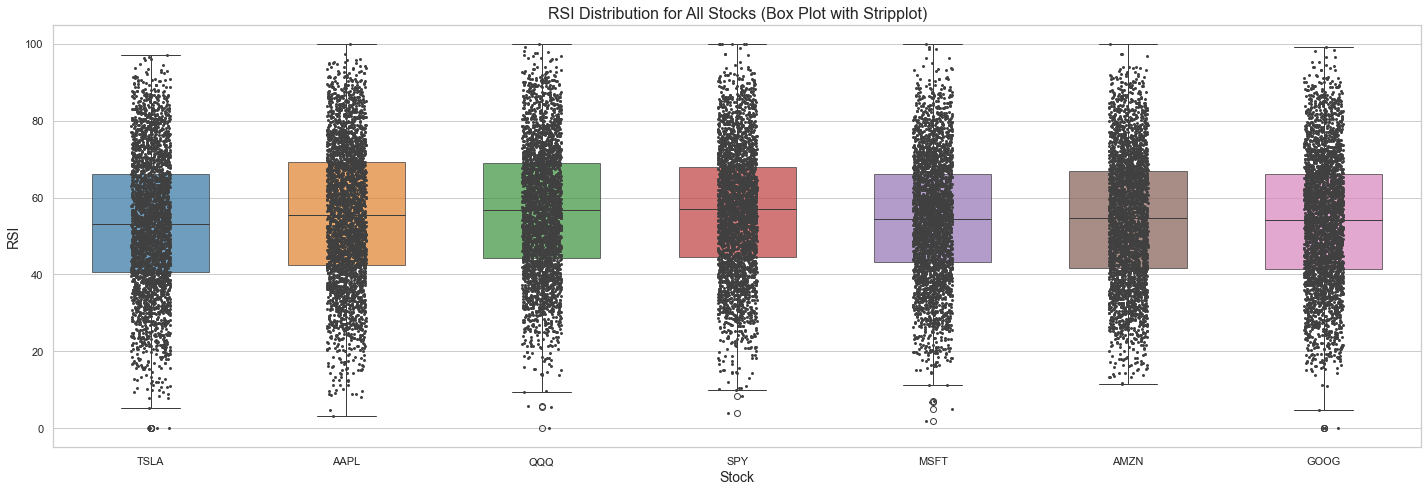

In [10]:
helper.plot_rsi_distribution(stock_data)